In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv(
    "movies.csv",
    engine="python",
    on_bad_lines="skip"
)


## 3. Required Columns Select

In [9]:
df = df[['budget',
         'vote_average',
         'vote_count',
         'popularity',
         'runtime',
         'revenue']]



The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.



## 4.Data Cleaning

### (a) Missing values remove

In [11]:
df.dropna(inplace=True)

### (b) Zero revenue & budget remove (important)

In [12]:
df = df[(df['revenue'] > 0) & (df['budget'] > 0)]


## 5. Exploratory Data Analysis (Patterns)

### Budget vs Revenue

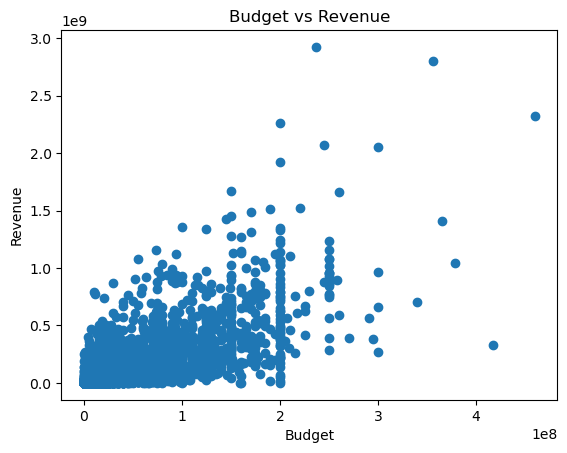

In [13]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.show()


### Popularity vs Revenue

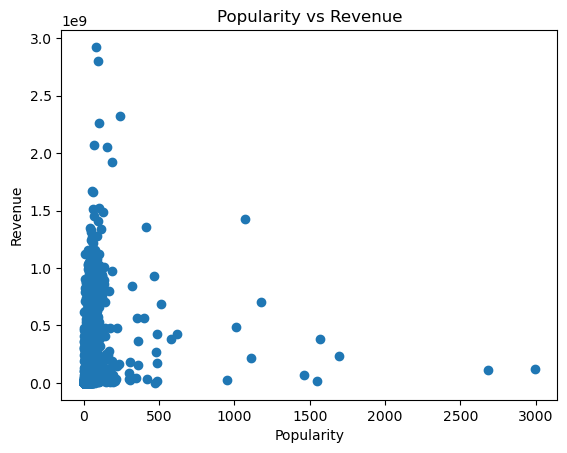

In [14]:
plt.scatter(df['popularity'], df['revenue'])
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.title("Popularity vs Revenue")
plt.show()

## 6. Features & Target Split

In [15]:
X = df[['budget',
        'vote_average',
        'vote_count',
        'popularity',
        'runtime']]

y = df['revenue']


## 7.Train–Test Split

In [16]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## 8.Feature Scaling (Very Important)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 9.Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

## 10.Prediction

In [19]:
y_pred = model.predict(X_test_scaled)

## 11 .Model Evaluation

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))



MAE: 43504408.46141261
MSE: 7482103722460533.0
RMSE: 86499154.4609572
R2 Score: 0.7254216811948324


## 12. Actual vs Predicted Plot

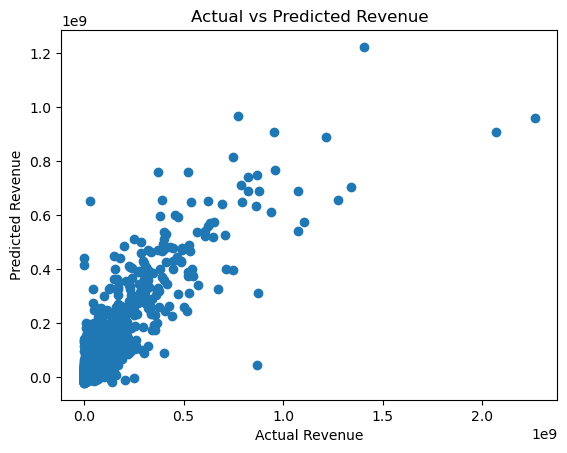

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


## 13. Model Coefficients (Explain in Viva)


In [23]:
coeff_df = pd.DataFrame(
    model.coef_,
    X.columns,
    columns=['Coefficient']
)

print(coeff_df)


               Coefficient
budget        7.565601e+07
vote_average -9.245057e+03
vote_count    7.718466e+07
popularity    5.767430e+06
runtime       1.214650e+06
